<a href="https://colab.research.google.com/github/Koyelisha/Machine-Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
dataset = pd.DataFrame(df.data,columns=df.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
x = dataset
y = df.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [7]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,726.0,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,1015.0,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,1044.0,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,1686.0,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2738.0,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [8]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.mean(),x_train.std())

3.009838063866638e-16 1.0


# **Ridge Regression**
1. Ridge Regression used for reducing overfitting
we'll do hyper parameter tuning for getting the perfect parameter (alpha--)
2. Gridsearchcv

Considering Low bias and low variance


In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [10]:
ridge_regression = Ridge()
ridge_regression

Ridge()

In [11]:
parameter = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgeCV = GridSearchCV(ridge_regression,parameter,scoring='neg_mean_squared_error',cv =5 ) #for cross validation
ridgeCV.fit(x_train,y_train)  #It will conduct 5 cross validation with all these parameters.. and among them it will select the most suitable parameter

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [12]:
print(ridgeCV.best_params_)

{'alpha': 5}


In [14]:
print(ridgeCV.best_score_) #best mean squared error

-0.5230459199911858


In [16]:
ridge_pred = ridgeCV.predict(x_test)

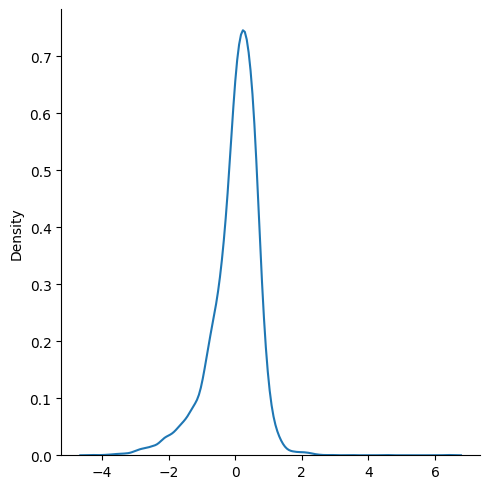

In [17]:
import seaborn as sns
sns.displot(ridge_pred - y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score
score = r2_score(ridge_pred,y_test)
score

0.3666062728051136

# **Lasso Regression**

In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso()
lasso

Lasso()

In [21]:
lassoCV = GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv =5 ) #for cross validation
lassoCV.fit(x_train,y_train)  #It will conduct 5 cross validation with all these parameters.. and among them it will select the most suitable parameter

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [23]:
print(lassoCV.best_params_,lassoCV.best_score_)

{'alpha': 1} -1.3311092498802068


In [24]:
lasso_pred = lassoCV.predict(x_test)

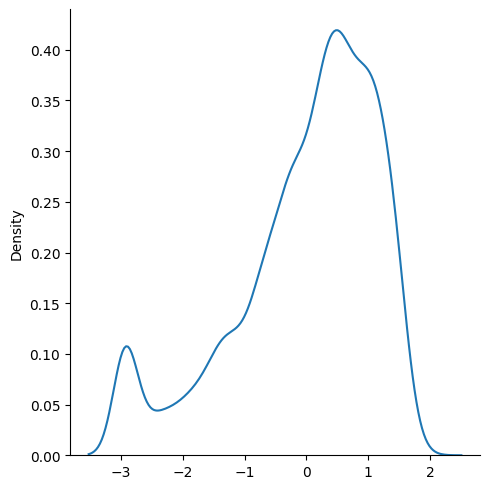

In [25]:
sns.displot(lasso_pred - y_test,kind = 'kde')